<a href="https://colab.research.google.com/github/Nimisha-J/DATA-601/blob/main/Projects/Project2_MakingPredictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src='http://drive.google.com/uc?export=view&id=1ZhMMgLVVc2Tm79BanxAusgHB51pgC6iL'>

# <font color='lightblue'>Making Predictions</font>

In this project you will build a model to make predictions. This project will build on your exploritory data analyitic (EDA) skills. You may choose to use the datasets you used with project 1 or move to another dataset.

In this project you will:

1.  Develop an understanding of the dataset
2.  Do exploritory data analysis and visualzation
3.  Do some data preprocessing
4.  Build a predictive model
5.  Measure the performance of your model
6.  Summarize and interpret your results



In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## <font color='lightblue'>1. Data Understanding </font>

The pd.read_csv() function is used to load the dataset. The skiprows=1 argument is used to skip the first row of the CSV file, which contains irrelevant header information.


In [8]:
Death = pd.read_csv("/content/deaths-by-gender-and-age.csv", skiprows=1)

**Action:** Determine the types of data are you dealing with & handle missing data (if there is any!). *Marks (0.5)*

Displays the first 5 rows of the Death DataFrame, which is crucial for a preliminary check of the data structure and content.

In [9]:
Death.head(5)

,Calendar Year,Cause,Gender,0-4,5-9,10-14,15-19,20-24,25-29,30-34,...,65-69,70-74,75-79,80-84,85-89,90+,NS,Res Total,Non Res Total,Grand Total
0,2001,1 Cholera,M,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,1 Cholera,F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,1 Cholera,T,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,2 Typhoid fever,M,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,2 Typhoid fever,F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dimension Check: The .shape attribute returns a tuple representing the number of rows and columns in the DataFrame, confirming the dataset's size.

In [10]:
Death.shape

(26486, 26)

Structure Overview: The .info() method provides a concise summary of the DataFrame, including the data types of each column (e.g., integer, object/string), and the number of non-null values.

In [11]:
Death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26486 entries, 0 to 26485
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Calendar Year   26486 non-null  int64 
 1   Cause           26486 non-null  object
 2   Gender          26486 non-null  object
 3   0-4             26486 non-null  int64 
 4   5-9             26486 non-null  int64 
 5   10-14           26486 non-null  int64 
 6   15-19           26486 non-null  int64 
 7   20-24           26486 non-null  int64 
 8   25-29           26486 non-null  int64 
 9   30-34           26486 non-null  int64 
 10  35-39           26486 non-null  int64 
 11  40-44           26486 non-null  int64 
 12  45-49           26486 non-null  int64 
 13  50-54           26486 non-null  int64 
 14  55-59           26486 non-null  int64 
 15  60-64           26486 non-null  int64 
 16  65-69           26486 non-null  int64 
 17  70-74           26486 non-null  int64 
 18  75-79 

This check is essential for data cleaning as it:

Identifies which columns contain missing data.

Quantifies the extent of the missingness, guiding decisions on whether to impute, remove, or ignore those columns.

In [13]:
Death.isnull().sum()

,0
Calendar Year,0
Cause,0
Gender,0
0-4,0
5-9,0
10-14,0
15-19,0
20-24,0
25-29,0
30-34,0


**Action:** Estimate the summary statistics of some of the key variables. *Marks (0.5)*

In [15]:
Death.describe()

,Calendar Year,0-4,5-9,10-14,15-19,20-24,25-29,30-34,35-39,40-44,45-49,50-54,55-59,60-64,65-69,70-74,NS,Res Total,Non Res Total,Grand Total
count,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000,26486.000000
mean,2012.367100,1.026429,0.088990,0.111040,0.422638,0.695046,0.835913,0.980216,1.193272,1.518878,2.158763,3.028619,4.116665,5.219210,6.212641,7.561278,0.004191,79.901118,1.499169,81.398324
std,6.572819,11.097348,0.986893,1.233116,4.759851,7.938631,10.232662,12.158968,14.360216,16.946609,23.212532,32.384949,44.552583,57.435714,68.230389,82.020838,0.133289,853.434662,16.366089,869.468027
min,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2007.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,4.000000
75%,2018.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,23.000000,0.000000,24.000000
max,2022.000000,356.000000,36.000000,47.000000,151.000000,270.000000,425.000000,551.000000,679.000000,665.000000,767.000000,1038.000000,1628.000000,2300.000000,2774.000000,3321.000000,9.000000,32215.000000,608.000000,32823.000000


In [30]:
df=pd.DataFrame(Death)
df.head(5)

,Calendar Year,Cause,Gender,0-4,5-9,10-14,15-19,20-24,25-29,30-34,...,65-69,70-74,75-79,80-84,85-89,90+,NS,Res Total,Non Res Total,Grand Total
0,2001,1 Cholera,M,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2001,1 Cholera,F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2001,1 Cholera,T,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2001,2 Typhoid fever,M,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2001,2 Typhoid fever,F,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## <font color='lightblue'>2. Data Exploration and Visualization </font>

**Action:** Visualize 1- the distribution of values for some key variables, and 2- the relationships between key variables. Remember to add text that walks a reader through what you found. *Marks: 2*

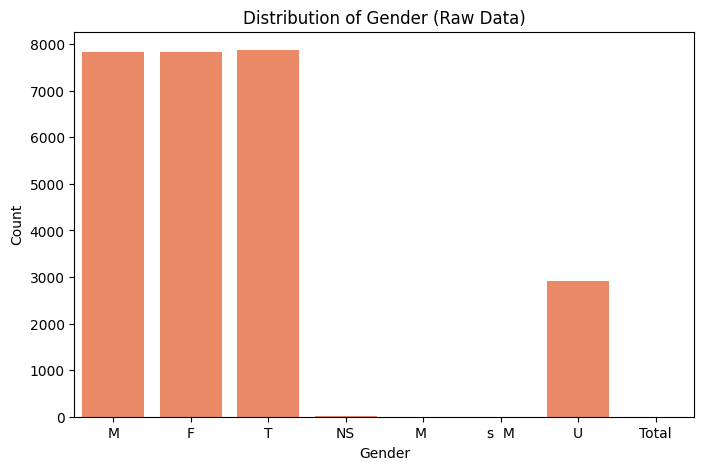

In [28]:
plt.figure(figsize=(8, 5))
sns.countplot(x='Gender', data=Death, color='coral')
plt.title("Distribution of Gender (Raw Data)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

**Action:** Use correlation to estimate the relationship between some of the key variables. Remember to add text that helps a reader interpret the correlations. *Marks: 1*

## <font color='lightblue'>3. Data preprocessing </font>

**Action:** Do you need to apply any preprocessing steps? E.g., convert a binary variable to 1/0, or use one-hot encoding to convert categorical variables? Apply at least one preprocessing step, and explain why you used it. *Marks: 2*

**Data Cleaning**

**Justification for Age Group Exclusion**
The filtering of the dataset to include only ages 20-64 (removing groups below 20 and above 64) is a deliberate step to narrow the focus to the economically active, working-age population. This exclusion is justified by the need to isolate mortality data relevant to premature loss of life and economic productivity. The excluded groups, 0-19 and 65+, are typically dominated by distinct and separate mortality patterns: early childhood/adolescent deaths (often congenital or external causes) and deaths due to old age and chronic degenerative diseases, respectively. By focusing on the 20-64 demographic, the analysis provides a clearer, more targeted assessment of the causes of death most disruptive to the workforce and national economy, which is essential for guiding public health and prevention policies aimed at working adults.



In [31]:
# Identify columns to drop
indices_to_drop = [3, 4, 5, 6, 16, 17, 18, 19, 20, 21]

# Create the working DataFrame 'df' by dropping the columns
df = df.drop(df.columns[indices_to_drop], axis=1).copy()

print("--- Working DataFrame Head (after column drop) ---")
print(df.head())

--- Working DataFrame Head (after column drop) ---
   Calendar Year              Cause Gender  20-24  25-29  30-34  35-39  40-44  \
0           2001        1   Cholera      M      0      0      0      0      0   
1           2001        1   Cholera      F      0      0      0      0      0   
2           2001        1   Cholera      T      0      0      0      0      0   
3           2001  2   Typhoid fever      M      0      0      0      0      0   
4           2001  2   Typhoid fever      F      0      0      0      0      0   

   45-49  50-54  55-59  60-64  NS  Res Total  Non  Res Total  Grand Total  
0      0      0      0      0   0          0               0            0  
1      0      0      0      0   0          0               0            0  
2      0      0      0      0   0          0               0            0  
3      0      0      0      0   0          0               0            0  
4      0      0      0      0   0          0               0            0  


In [32]:
df['Gender'].unique()

array(['M', 'F', 'T', 'NS', 'M ', 's  M', 'U', 'Total'], dtype=object)

In [33]:
# Remove 's ' and trim whitespace from the Gender column
df['Gender'] = df['Gender'].str.replace('s ', '', regex=False)
df['Gender'] = df['Gender'].str.strip()

In [34]:
df['Gender'].unique()

array(['M', 'F', 'T', 'NS', 'U', 'Total'], dtype=object)

In [42]:
# Remove unwanted values and keep only M, F, U
df = df[df['Gender'].isin(['M', 'F', 'U'])]
df['Gender'].unique()

array(['M', 'F', 'U'], dtype=object)

In [43]:
df['Gender'].value_counts()

,count
Gender,
M,7844
F,7835
U,2914


**Action:** Split your data into training and testing datasets *Marks: 1*

**Action: (optional)** Scale any numeric variables. If you have no binary or categorical variables that need transforming, scaling will count towards your marks for your preprocessing step.

## <font color='lightblue'>4. Build a model</font>



**Action:** Use your training dataset to build a model with the goal of predicting a target variable. *Marks: 2*

## <font color='lightblue'>5. Measure performance</font>

**Action:** Use your testing dataset to estimate the performance of your model. Add text describing what kind of measure you used. *Marks: 2*

## <font color='lightblue'>6. Discussion and interpretation</font>

**Q1:**
> What have you learnt about the ability to model and predict your variable of interest? *Marks: 1*

> What variables are responsible for the predictive ability of your model, and what does your model suggest about the relationships these variables have with your target variable? (i.e., think magnitude and sign of each effect). *Marks: 2*

> How did these relationships generalize to the with-held sample (i.e., testing data sample)? *Marks: 1*